<a href="https://colab.research.google.com/github/herkart1011/MachineLearningTasks/blob/main/Week%202/01_Logistic_Regression_CitarumWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error, r2_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [5]:
# Memuat dataset CitarumWater
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Dataset/Week 2/CitarumWater.csv')  # Sesuaikan path file sesuai dengan lokasi dataset
print(dataset.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.

In [6]:
# Menghapus kolom yang tidak diperlukan (misalnya, 'No', 'NamaSungai', 'TitikPantau', dan 'Waktu')
dataset = dataset.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'O2'])

In [7]:
# Menghapus simbol °C dari kolom 'Temp' dan mengubahnya menjadi numerik
dataset['Temp'] = dataset['Temp'].str.replace('°C', '').astype(float)

In [8]:
# Memisahkan fitur (X) dan target (y)
X = dataset.iloc[:, :-1].values  # Semua kolom kecuali kolom terakhir sebagai fitur
y = dataset.iloc[:, -1].values   # Kolom terakhir ('Class') sebagai target

In [9]:
# Membagi dataset menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Melakukan standardisasi pada fitur (mengubah skala data agar seragam)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit dan transformasi pada training set
X_test = scaler.transform(X_test)        # Transformasi pada test set menggunakan skala yang sama

In [11]:
# Membangun model Logistic Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)  # Melatih model pada training set

LogisticRegression(random_state=0)

In [12]:
# Memprediksi hasil pada test set
y_pred = classifier.predict(X_test)

In [13]:
# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model Logistic Regression: {accuracy:.2f}')

# Menghitung F1-score untuk model
f1 = f1_score(y_test, y_pred, average='macro')  # Average 'macro' digunakan untuk multi-class classification
print(f'F1-Score Model Logistic Regression: {f1:.2f}')

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi Model Logistic Regression: 0.97
F1-Score Model Logistic Regression: 0.90

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.98      0.97       187
           2       0.99      0.97      0.98       301
           3       0.75      1.00      0.86         6
           4       1.00      0.67      0.80         6

    accuracy                           0.97       500
   macro avg       0.92      0.90      0.90       500
weighted avg       0.97      0.97      0.97       500



* **Akurasi Model Logistic Regression** :  
    * Akurasi dihitung sebagai rasio antara jumlah prediksi benar dengan total jumlah prediksi. Artinya, model memprediksi 97% dari total 500 sampel dengan benar.
    * Akurasi yang tinggi menunjukkan bahwa model dapat memprediksi sebagian besar sampel dengan benar. Namun, akurasi saja tidak selalu memberikan gambaran lengkap mengenai kinerja model, terutama pada dataset yang tidak seimbang.
    
* **F1-Score** adalah rata-rata harmonik dari precision dan recall. Ini adalah metrik yang baik untuk mengevaluasi model ketika ada ketidakseimbangan antar kelas, karena menggabungkan informasi dari precision (ketepatan) dan recall (kelengkapan).

* **Classification Report** :
    1. *Precision* :
        * Precision adalah rasio antara jumlah prediksi benar untuk suatu kelas dengan total prediksi yang diberikan model untuk kelas tersebut. Nilai precision yang tinggi menunjukkan bahwa model memiliki sedikit False Positive.
    2. *Recall* :
        * Recall adalah rasio antara jumlah prediksi benar untuk suatu kelas dengan total sampel aktual di kelas tersebut. Recall adalah rasio antara jumlah prediksi benar untuk suatu kelas dengan total sampel aktual di kelas tersebut.
    3. *F1 - Score* :
        * F1-Score adalah rata-rata harmonik dari precision dan recall. Ini menggabungkan kedua metrik ini untuk memberikan gambaran keseluruhan tentang kinerja model pada setiap kelas.
    4. *Support* :
        * Support adalah jumlah sampel aktual di setiap kelas dalam dataset. Ini menunjukkan distribusi data pada setiap kelas.


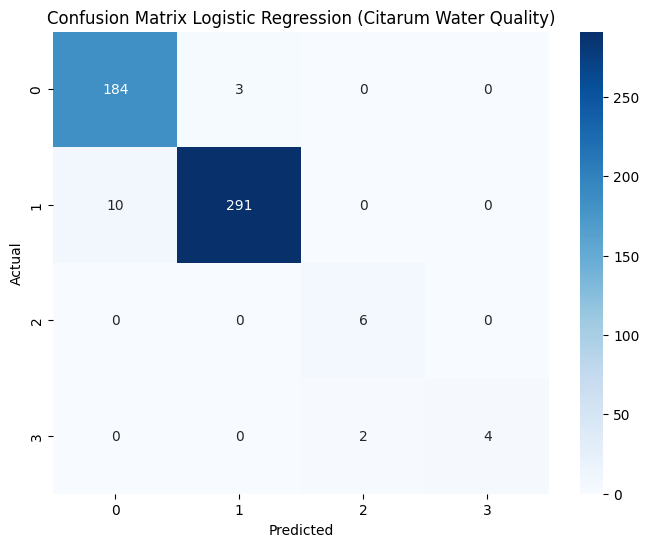

In [14]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression (Citarum Water Quality)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Kesimpulan**
Model Logistic Regression ini memiliki akurasi tinggi (97%) dan nilai F1-Score yang cukup baik (90%).